In [218]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Generate Synthetic Data
n = 500
d = 1000
k = 100
sig = 1

w_data = np.zeros(d)
w_data[0:k] = np.arange(1, k+1) / k
X = np.random.normal(0, 1, (n, d))
y = X.dot(w_data) + np.random.normal(0, sig**2, n)

In [219]:
# Lasso:
def lasso(l, w_start, X_start, y_start):
    lam = l
    X = X_start
    n, d = X.shape
    y = y_start
    w = w_start.copy()
    delta = 0.001 # stopping condition, loosen for speed
    cont = True
    while cont: 
        cont = False
        # calculate b
        b = np.mean(y - X.dot(w))
        a_pre = np.sum(X**2, axis = 0)
        for k in range(d):
            a = a_pre[k] * 2 # calculate a_k
            c = 2*X[:,k].dot(y - (b + X.dot(w) - X[:,k]*w[k])) # calculate c_k
            # calculate w_k
            w_old = w[k]
            w[k] = 0
            if c < -lam:
                w[k] = (c + lam) / a
            elif c > lam:
                w[k] = (c - lam) / a
            if abs(w_old - w[k]) > delta:
                cont = True
    return w

In [235]:
y_bar = y - y.mean()
lam_max = np.max(2 * np.transpose(X).dot(y_bar))

lams = []
zeros = []

FDR = []
TPR = []

w = np.zeros(d)
l = lam_max
while np.count_nonzero(w) < d:
    w = lasso(l, w, X, y)
    lams.append(l)
    zeros.append(np.count_nonzero(w))
    incorrect = 0
    correct = 0
    for i in range(d):
        if w[i] != 0 and w_data[i] == 0:
            incorrect = incorrect + 1
        elif w[i] != 0 and w_data[i] != 0:
            correct = correct + 1
    if (np.count_nonzero(w) > 0):
        FDR.append((incorrect)/np.count_nonzero(w))
    else:
        FDR.append(0)
    TPR.append(correct/k)
    l = l / 1.5

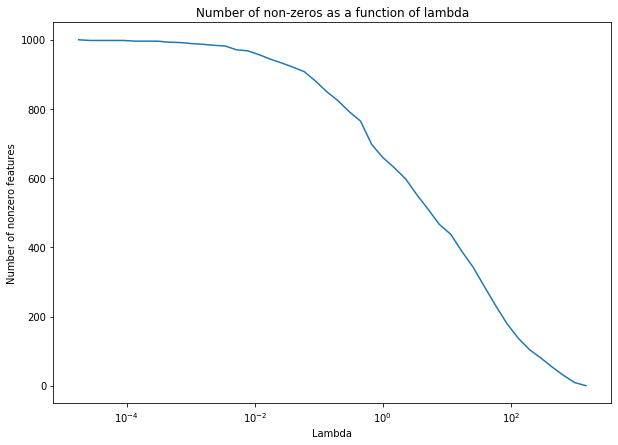

In [236]:
plt.figure(figsize=(10,7))
plt.plot(lams, zeros)
plt.xscale('log')
plt.title("Number of non-zeros as a function of lambda")
plt.xlabel("Lambda")
plt.ylabel("Number of nonzero features")
plt.show()

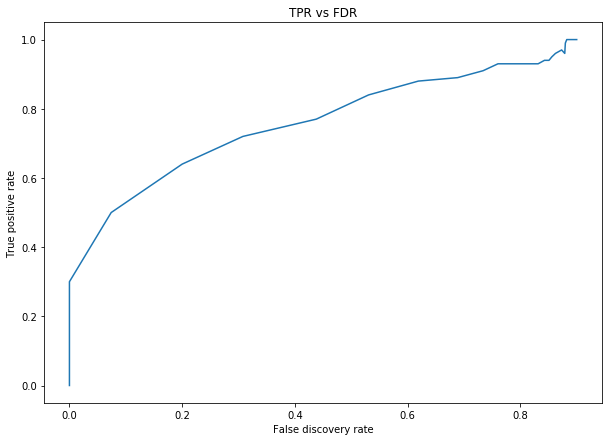

In [237]:
plt.figure(figsize=(10,7))
plt.plot(FDR, TPR)
plt.title("TPR vs FDR")
plt.xlabel("False discovery rate")
plt.ylabel("True positive rate")
plt.show()

In [238]:
import pandas as pd
df_train = pd.read_table("crime-train.txt") 
df_test = pd.read_table("crime-test.txt")

y_train = df_train['ViolentCrimesPerPop'].values
y_test = df_test['ViolentCrimesPerPop'].values
X_train = df_train.drop('ViolentCrimesPerPop', axis = 1).values
X_test = df_test.drop('ViolentCrimesPerPop', axis = 1).values

y_bar = y_train - y_train.mean()
lam_max = np.max(2 * np.transpose(X_train).dot(y_bar))

lams = []
zeros = []

agePct12t29 = [] #4
pctWSocSec = [] #13
pctUrban = [] #8
agePct65up = [] #6
householdsize = [] #2

def error(X, y, w, lam):
    difference = y - X.dot(w)
    return np.sum(difference**2) + lam*np.sum(np.abs(w))

error_train = []
error_test = []

w = np.zeros(95)
l = lam_max
while l >= 0.01:
    w = lasso(l, w, X_train, y_train)
    lams.append(l)
    zeros.append(np.count_nonzero(w))
    
    agePct12t29.append(w[4])
    pctWSocSec.append(w[13])
    pctUrban.append(w[8])
    agePct65up.append(w[6])
    householdsize.append(w[2])
    
    error_train.append(error(X_train, y_train, w, l))
    error_test.append(error(X_test, y_test, w, l))
    
    l = l / 2

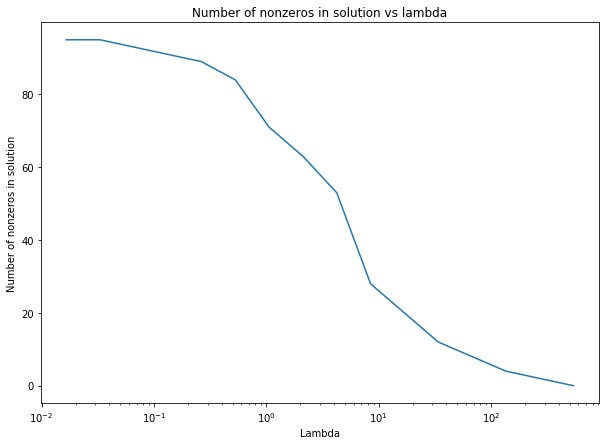

In [239]:
plt.figure(figsize=(10,7))
plt.plot(lams, zeros)
plt.xscale('log')
plt.title("Number of nonzeros in solution vs lambda")
plt.xlabel("Lambda")
plt.ylabel("Number of nonzeros in solution")
plt.show()

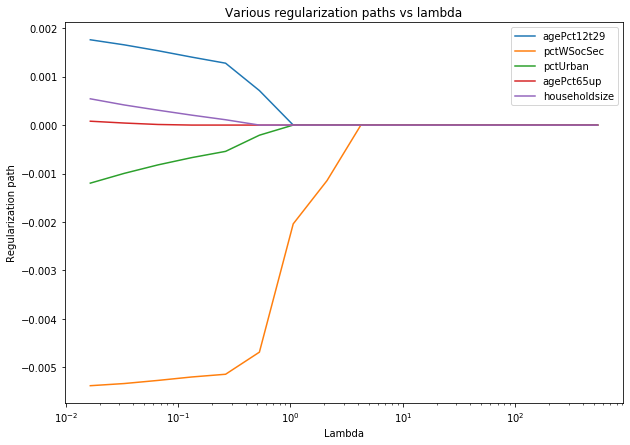

In [240]:
plt.figure(figsize=(10,7))
plt.plot(lams, agePct12t29, label='agePct12t29')
plt.plot(lams, pctWSocSec, label ='pctWSocSec')
plt.plot(lams, pctUrban, label ='pctUrban')
plt.plot(lams, agePct65up, label ='agePct65up')
plt.plot(lams, householdsize, label='householdsize')
plt.xscale('log')
plt.title("Various regularization paths vs lambda")
plt.xlabel("Lambda")
plt.ylabel("Regularization path")
plt.legend()
plt.show()

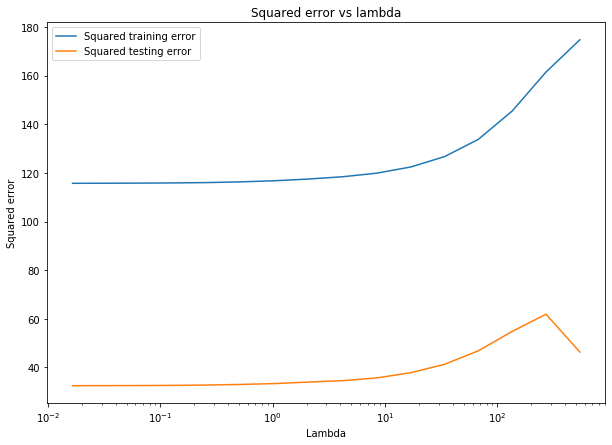

In [241]:
plt.figure(figsize=(10,7))
plt.plot(lams, error_train, label='Squared training error')
plt.plot(lams, error_test, label='Squared testing error')
plt.xscale('log')
plt.title("Squared error vs lambda")
plt.xlabel("Lambda")
plt.ylabel("Squared error")
plt.legend()
plt.show()

In [251]:
W = lasso(30, w, X_train, y_train)
print(W)
print(df_train.columns.values[46]) # most positive
print(df_train.columns.values[40]) # most negative

[ 0.          0.          0.         -0.0035924   0.          0.
  0.          0.01021649  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01217136  0.          0.
  0.          0.          0.         -0.06705304  0.          0.
  0.         -0.0056441   0.          0.07055776  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.03058821  0.          0.
  0.02074246 -0.00743067  0.          0.00112252  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01553775  0.          0.          0.          0.
  0.          0.         

In [253]:
import numpy as np
from mnist import MNIST
import scipy as scipy

mndata = MNIST('./data/')
X_train, labels_train = map(np.array, mndata.load_training()) 
X_test, labels_test = map(np.array, mndata.load_testing()) 
X_train = X_train/255.0
X_test = X_test/255.0

train_mask = np.isin(labels_train, [2, 7])
test_mask = np.isin(labels_test, [2, 7])
X_train27 = X_train[train_mask]
y_train27 = (labels_train[train_mask] == 7) * 2 - 1
X_test27 = X_test[test_mask]
y_test27 = (labels_test[test_mask] == 7) * 2 - 1

In [254]:
# Gradient Descent
lam = 0.1
n, d = X_train27.shape
w = np.zeros(d)
b = 0
m = n

def gradient_w(w, b, X, y, lam):
    u = 1 / (1 + np.exp(-y * (b + X.dot(w))))
    sum = 0
    for i in range(m):
        sum += (1 - u[i])*(-y[i]*X[i].T)
    return (1/len(X)) * sum + 2*lam*w
    
def gradient_b(w, b, X, y):
    u = 1 / (1 + np.exp(-y * (b + X.dot(w))))
    return (1 - u).dot(-y) * (1/len(X))

j_train = []
j_test = []

def J(w, b, X, y, lam=0.1):
    return np.mean(np.log(1 + np.exp(-y * (b + X.dot(w))))) + lam*w.dot(w)

classify_train = []
classify_test = []

while np.linalg.norm(gradient_w(w, b, X_train27, y_train27, lam)) > 0.01 or abs(gradient_b(w, b, X_train27, y_train27)) > 0.01:
    j_train.append(J(w, b, X_train27, y_train27))
    j_test.append(J(w, b, X_test27, y_test27))
    
    classify_train.append(np.mean(np.sign(b + X_train27.dot(w)) != y_train27))
    classify_test.append(np.mean(np.sign(b + X_test27.dot(w)) != y_test27))
    
    w_old = w
    b_old = b
    w = w_old - 0.3 * gradient_w(w_old, b_old, X_train27, y_train27, lam)
    b = b_old - 0.3 * gradient_b(w_old, b_old, X_train27, y_train27)

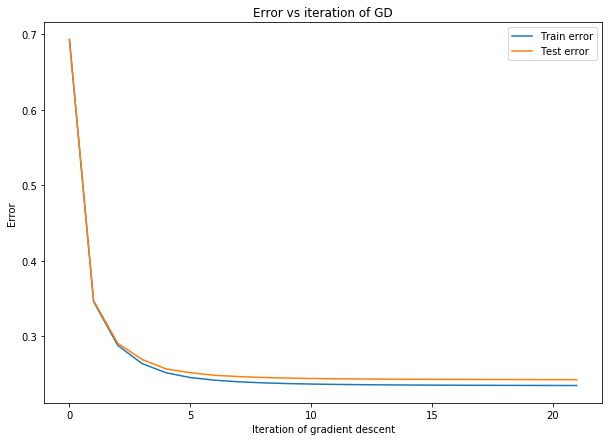

In [256]:
plt.figure(figsize=(10,7))
plt.title("Error vs iteration of GD")
plt.xlabel("Iteration of gradient descent")
plt.ylabel("Error")
plt.plot(j_train, label='Train error')
plt.plot(j_test, label='Test error')A
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

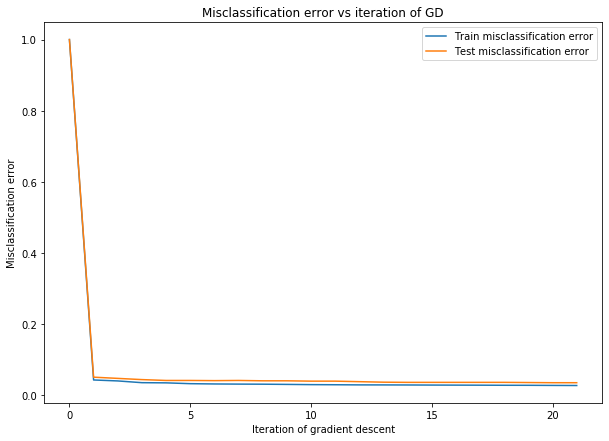

In [257]:
# Misclassification error plot
plt.figure(figsize=(10,7))
plt.title("Misclassification error vs iteration of GD")
plt.xlabel("Iteration of gradient descent")
plt.ylabel("Misclassification error")
plt.plot(classify_train, label='Train misclassification error')
plt.plot(classify_test, label='Test misclassification error')
plt.legend()
plt.show

In [258]:
# Stochastic Gradient Descent: batch size 1
n, d = X_train27.shape
m = 1
lam = 0.1
w = np.zeros(d)
b = 0

w_old = 1
b_old = 1

j_train = []
j_test = []

classify_train = []
classify_test = []

for i in range(500):
    index = np.random.choice(n, m, replace=False)
    
    j_train.append(J(w, b, X_train27, y_train27))
    j_test.append(J(w, b, X_test27, y_test27))
    
    classify_train.append(np.mean(np.sign(b + X_train27.dot(w)) != y_train27))
    classify_test.append(np.mean(np.sign(b + X_test27.dot(w)) != y_test27))
    
    w_old = w
    b_old = b
    w = w_old - 0.01 * gradient_w(w_old, b_old, X_train27[index], y_train27[index], lam)
    b = b_old - 0.01 * gradient_b(w_old, b_old, X_train27[index], y_train27[index])

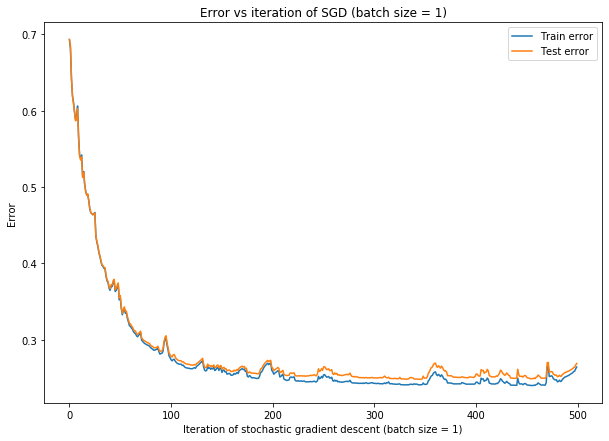

In [260]:
plt.figure(figsize=(10,7))
plt.title("Error vs iteration of SGD (batch size = 1)")
plt.xlabel("Iteration of stochastic gradient descent (batch size = 1)")
plt.ylabel("Error")
plt.plot(j_train, label='Train error')
plt.plot(j_test, label='Test error')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

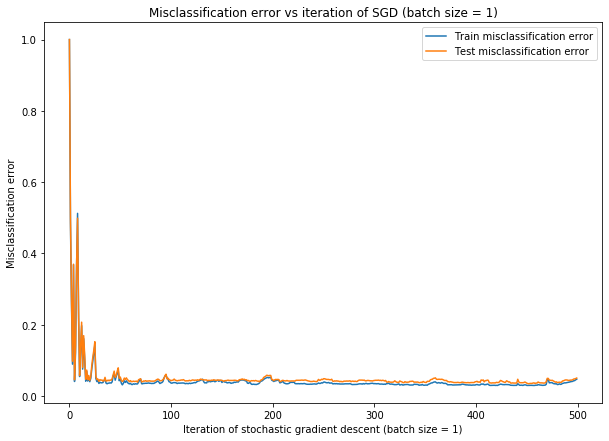

In [261]:
# Misclassification error plot
plt.figure(figsize=(10,7))
plt.title("Misclassification error vs iteration of SGD (batch size = 1)")
plt.xlabel("Iteration of stochastic gradient descent (batch size = 1)")
plt.ylabel("Misclassification error")
plt.plot(classify_train, label='Train misclassification error')
plt.plot(classify_test, label='Test misclassification error')
plt.legend()
plt.show

In [262]:
# Stochastic Gradient Descent: batch size 100
n, d = X_train27.shape
m = 100
lam = 0.1
w = np.zeros(d)
b = 0

w_old = 1
b_old = 1

j_train = []
j_test = []

classify_train = []
classify_test = []

for i in range(500):
    index = np.random.choice(n, m, replace=False)
    
    j_train.append(J(w, b, X_train27, y_train27))
    j_test.append(J(w, b, X_test27, y_test27))
    
    classify_train.append(np.mean(np.sign(b + X_train27.dot(w)) != y_train27))
    classify_test.append(np.mean(np.sign(b + X_test27.dot(w)) != y_test27))
    
    w_old = w
    b_old = b
    w = w_old - 0.01 * gradient_w(w_old, b_old, X_train27[index], y_train27[index], lam)
    b = b_old - 0.01 * gradient_b(w_old, b_old, X_train27[index], y_train27[index])

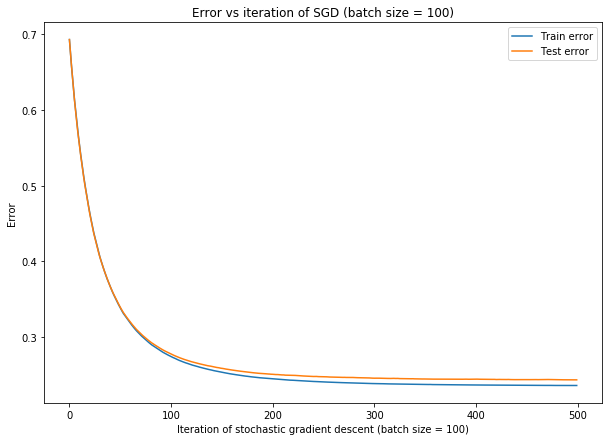

In [263]:
plt.figure(figsize=(10,7))
plt.title("Error vs iteration of SGD (batch size = 100)")
plt.xlabel("Iteration of stochastic gradient descent (batch size = 100)")
plt.ylabel("Error")
plt.plot(j_train, label='Train error')
plt.plot(j_test, label='Test error')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

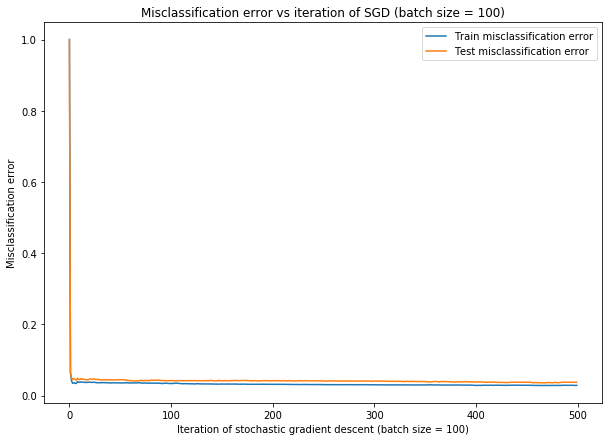

In [264]:
# Misclassification error plot
plt.figure(figsize=(10,7))
plt.title("Misclassification error vs iteration of SGD (batch size = 100)")
plt.xlabel("Iteration of stochastic gradient descent (batch size = 100)")
plt.ylabel("Misclassification error")
plt.plot(classify_train, label='Train misclassification error')
plt.plot(classify_test, label='Test misclassification error')
plt.legend()
plt.show